IS Fraud / NOT Fraud

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [59]:
df = pd.read_csv('onlinefraud.csv')
df


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


ok isFraud & isFlaggedFraud INTERI (int64)

In [37]:
#Conteggio 
fraud_counts = df['isFraud'].value_counts()

In [38]:
# Mapping per etichette più comprensibili
#fraud_counts.index = ['No', 'Yes']

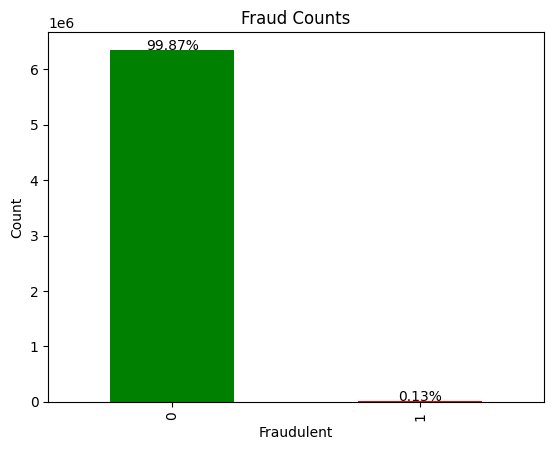

In [39]:
# Creazione del grafico a barre
ax = fraud_counts.plot(kind='bar', color=['green', 'red'])

# Calcolo delle percentuali
fraud_percentages = (fraud_counts / fraud_counts.sum()) * 100

# Etichette per l'asse x e y
plt.xlabel('Fraudulent')
plt.ylabel('Count')

# Mostra le percentuali sopra le barre
for i, v in enumerate(fraud_counts):
    ax.text(i, v + 0.1, f"{fraud_percentages[i]:.2f}%", ha='center')

# Titolo del grafico
plt.title('Fraud Counts')

# Visualizzazione del grafico
plt.show()

In [40]:
new_df = df.drop(["amount","nameDest", "nameOrig", "step", "type", "oldbalanceOrg", "newbalanceOrig","oldbalanceDest","newbalanceDest"], axis=1)
new_df

,isFraud,isFlaggedFraud
0,0,0
1,0,0
2,1,0
3,1,0
4,0,0
...,...,...
6362615,1,0
6362616,1,0
6362617,1,0
6362618,1,0


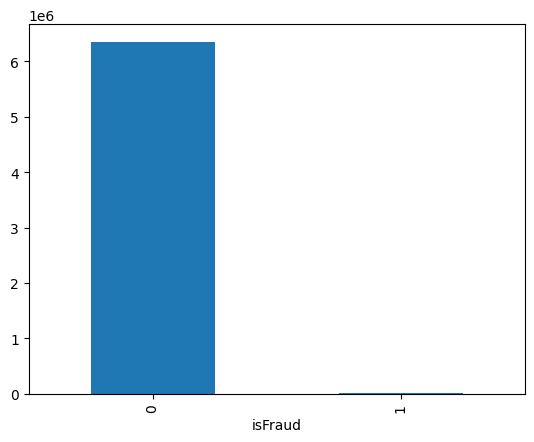

In [41]:
df['isFraud'].value_counts().plot.bar();

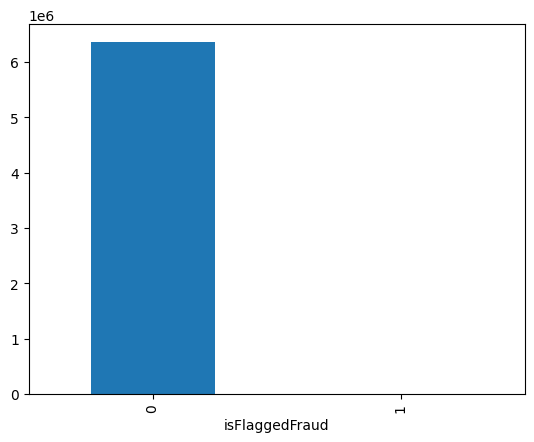

In [42]:
df['isFlaggedFraud'].value_counts().plot.bar();

In [43]:
X = new_df.loc[:, new_df.columns != 'isFraud']
y = new_df.loc[:, new_df.columns == 'isFraud']

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 700, 
                                                    shuffle = True, 
                                                    stratify = y
                                                    )

In [45]:
#import pandas as pd
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split

# Supponiamo di avere un DataFrame 'data' con una colonna 'feature' e una colonna 'target'
# Estraiamo le features e la variabile target
#X = new_df[['isFlaggedFraud']]  # Seleziona la colonna 'feature' come features
#y = new_df['isFraud']     # Seleziona la colonna 'target' come variabile target

# Esegui la divisione in set di addestramento e test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inizializza il modello di regressione logistica
#model = LogisticRegression(solver='lbfgs')

# Addestra il modello sui dati di addestramento
#model.fit(X_train, y_train)


In [46]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Supponiamo di avere un DataFrame 'data' con una colonna 'feature' e una colonna 'target'
# Estraiamo le features e la variabile target
X = new_df[['isFraud']]  # Seleziona la colonna 'feature' come features
y = new_df['isFlaggedFraud']     # Seleziona la colonna 'target' come variabile target

# Esegui la divisione in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inizializza il modello di regressione logistica
model = LogisticRegression(solver='lbfgs')

# Addestra il modello sui dati di addestramento
model.fit(X_train, y_train)

LogisticRegression()

In [47]:

# prediction for training dataset
train_pred = model.predict(X_train)

# prediction for testing dataset
test_pred = model.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score

print('Accuracy score for Training Dataset = ', accuracy_score(train_pred, y_train))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred, y_test))

Accuracy score for Training Dataset =  0.9999974460206644
Accuracy score for Testing Dataset =  0.9999976424806133


E` EVIDENTE CHE OVERFITTA

Senza Smote

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, test_pred)


cm

array([[1272521,       0],
       [      3,       0]], dtype=int64)

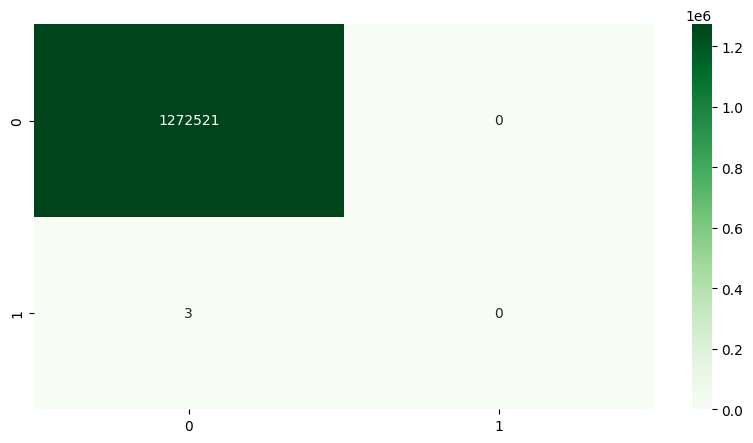

In [50]:
plt.figure(figsize=(10,5))

sns.heatmap(cm, annot=True,fmt=".0f",cmap='Greens');

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_pred))

c:\Users\ghisl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ghisl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1272521
           1       0.00      0.00      0.00         3

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524



c:\Users\ghisl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Synthetic Minority Oversampling Technique, or SMOTE

In [52]:
from imblearn.over_sampling import SMOTE
model_smote = LogisticRegression(solver = 'lbfgs')
sm = SMOTE(random_state = 667)

In [53]:
X_train_new, y_train_new = sm.fit_resample(X_train, y_train)

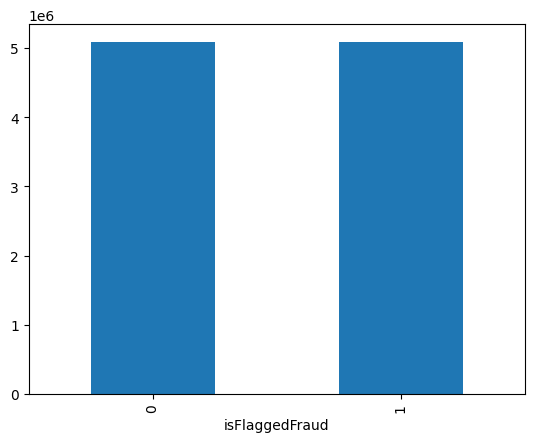

In [54]:
# observe that data has been balanced
y_train_new.value_counts().plot.bar();

In [55]:
# fit the model
model_smote.fit(X_train_new, y_train_new)

# prediction for Training data
train_pred_sm = model_smote.predict(X_train_new)

# prediction for Testing data
test_pred_sm = model_smote.predict(X_test)

In [56]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_sm, y_train_new))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred_sm, y_test))

Accuracy score for Training Dataset =  0.9993536451173782
Accuracy score for Testing Dataset =  0.9987292970505861


In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_new, train_pred_sm)
cm

array([[5083503,    6580],
       [      0, 5090083]], dtype=int64)

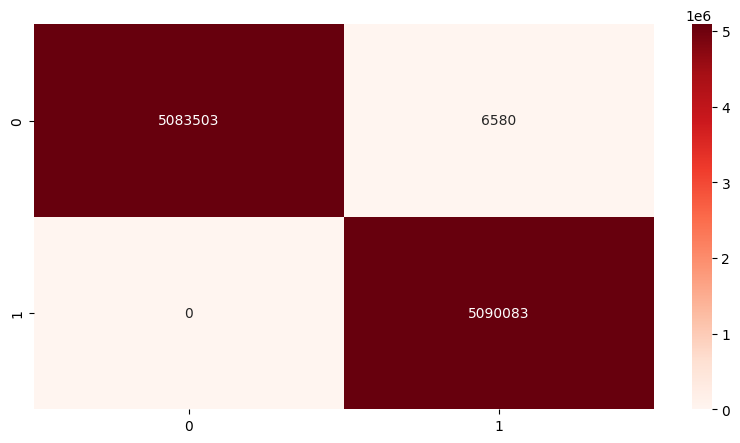

In [58]:
plt.figure(figsize=(10,5))

sns.heatmap(cm, annot=True,fmt=".0f",cmap='Reds');